In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

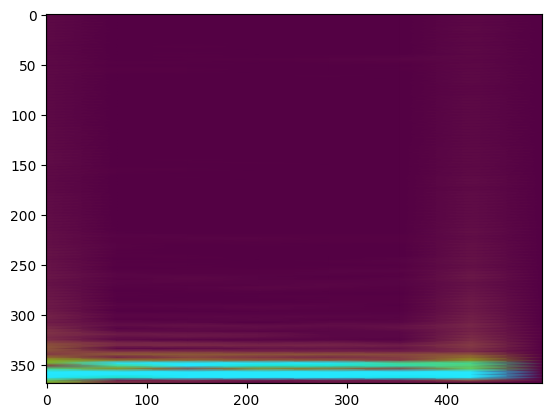

In [5]:
path="D:\\article\\Topological_analysis_time_series_speech\\file\\sft_plot_refine"
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break

pixel_0=img_array.shape[0]
pixel_1=img_array.shape[1]

In [6]:
labels=pd.read_csv("stft_label.csv")
labels=labels["label"]
labels.value_counts()

0    801
1    801
Name: label, dtype: int64

In [7]:
counter=0
training_data=[]
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    training_data.append([img_array,labels[counter]])
    counter=counter+1
    

In [8]:
random.shuffle(training_data)

In [9]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    if label==2:
        label=0
    y.append(label)
X = np.array(X).reshape(-1, pixel_0, pixel_1, 3)

In [10]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [2]:
X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

y = np.array(y)
X = X/225.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=25)


Epoch 1/25
18/18 [==============================] - 128s 7s/step - loss: 2.7118 - accuracy: 0.5201
Epoch 2/25
18/18 [==============================] - 121s 7s/step - loss: 0.6794 - accuracy: 0.5852
Epoch 3/25
18/18 [==============================] - 120s 7s/step - loss: 0.6197 - accuracy: 0.6637
Epoch 4/25
18/18 [==============================] - 120s 7s/step - loss: 0.5740 - accuracy: 0.6896
Epoch 5/25
18/18 [==============================] - 120s 7s/step - loss: 0.5356 - accuracy: 0.7217
Epoch 6/25
18/18 [==============================] - 119s 7s/step - loss: 0.5065 - accuracy: 0.7538
Epoch 7/25
18/18 [==============================] - 119s 7s/step - loss: 0.4606 - accuracy: 0.7690
Epoch 8/25
18/18 [==============================] - 119s 7s/step - loss: 0.4055 - accuracy: 0.7984
Epoch 9/25
18/18 [==============================] - 118s 7s/step - loss: 0.3618 - accuracy: 0.8323
Epoch 10/25
18/18 [==============================] - 119s 7s/step - loss: 0.3305 - accuracy: 0.8412
Epoch 11/

In [4]:
from sklearn.metrics import roc_curve
y_pred = model.predict(X).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y, y_pred)

51/51 [==============================] - 42s 818ms/step


In [5]:
np.savetxt("fpr.csv", fpr_keras, delimiter=",",header='x')
np.savetxt("tpr.csv", tpr_keras, delimiter=",",header='y')

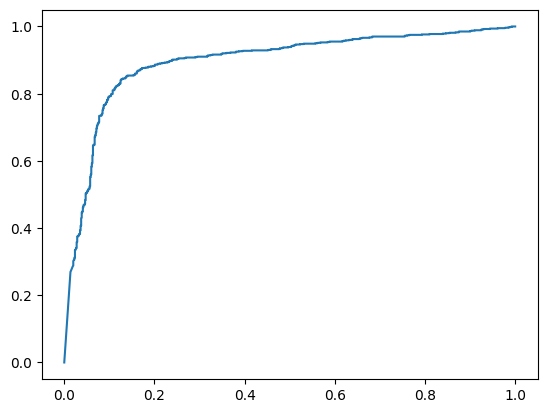

In [6]:
plt.plot(fpr_keras, tpr_keras)

In [7]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.8956711414103158

In [8]:
y_pred = (y_pred >= 0.5).astype(int)
print(accuracy_score(y, y_pred))

0.8508114856429463


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 367, 494, 64)      1792      
                                                                 
 activation (Activation)     (None, 367, 494, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 183, 247, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 181, 245, 128)     73856     
                                                                 
 activation_1 (Activation)   (None, 181, 245, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 122, 128)     0         
 2D)                                                    

In [24]:
#model.save("myModel.h5")

In [2]:
#from keras.models import load_model
#model = load_model("myModel.h5")